## 3rd Project | Machine Learning

###  Instructions

* Follow a Python Project structure.
* Work with a training and validation dataset to optimize & test your trading strategies using the datasets provided in the introduction section.
* The **ML models** that we'll be using are **Logistic Regression, Support Vector Machine & XGBoost**.
* Define the **independent** and **dependent** variables to train the models, remember that you can add any technical indicator to your dataset.
* Split the `train` datasets into train/test.
* Our dependent variable should be a category that we want to predict, i.e. "Buy" and "Not buy", or "Sell" and "Not sell" for the short models, we can construct it if the next k price is over / under a certain threshold.
* For each model, fine tune all hyperparameters worth moving, then you can easily generate the True / False signals to backtest.
* Be careful when selecting a metric to fine-tune.
* For each dataset train/test pair (1d, 1h, 5m, 1m):

    * Use the buy/sell signals from the predictions.
    * Create all possible combinations of all machine learning models (2^n - 1, 7...).
    * Backtest the strategies while keeping track of the operations and cash/portfolio value time series, remember that we'll be opening long & short positions.
    * Optimize the backtest parameters (TPE, Grid Search, PSO, Genetic Algorithms, ...), stop-loss/take-profit, volume of the trade, maximizing the profit of the strategy with the training dataset, consider the bounds of each variable!
    * Select the optimal strategy and describe it thoroughly (X, y variables used, a brief description of the ML models, results).
    * Now, use the optimal strategy with the test dataset and compare it to a passive strategy.

-------

In [1]:
from technical_analysis import Operation, TradingStrategy, MLModels

Show example of available all indicators

In [2]:
strategy = TradingStrategy('5m')

In [3]:
data = strategy.data
data[[ 'Open', 'High','Low', 'Close', 'Returns', 'Volatility', 'Close_Trend', 'Volume_Trend', 'Spread','Future_Return_Avg_5', 'Buy_Signal', 'Sell_Signal']].head(10)

,Open,High,Low,Close,Returns,Volatility,Close_Trend,Volume_Trend,Spread,Future_Return_Avg_5,Buy_Signal,Sell_Signal
0,-0.826867,-0.803899,-0.850440,-0.802354,0.000000,-1.246153,-0.018474,0.114432,4.010769,-0.000038,0,0
1,-0.802219,-0.788527,-0.808965,-0.790460,1.307792,-1.246153,-0.018474,0.114432,1.460314,-0.000905,0,1
2,-0.790154,-0.791850,-0.803100,-0.792129,-0.183117,-1.246153,-0.018474,0.114432,0.555380,-0.000029,0,0
3,-0.791952,-0.792262,-0.802262,-0.797554,-0.595443,-1.246153,-0.018474,0.114432,0.432354,0.000470,0,0
4,-0.797038,-0.796420,-0.803100,-0.804440,-0.756465,-1.246153,-0.018474,0.114432,0.102877,0.000572,0,0
5,-0.804334,-0.804314,-0.810222,-0.803397,0.114777,-1.246153,-0.018474,0.114432,0.020589,0.000915,1,0
6,-0.802878,-0.805768,-0.813155,-0.814661,-1.238814,-1.246153,-0.018474,0.114432,0.164549,0.001671,1,0
7,-0.814351,-0.793097,-0.813988,-0.792964,2.391275,-1.246153,-0.018474,0.114432,1.501055,0.000818,1,0
8,-0.792866,-0.780446,-0.791370,-0.785034,0.870379,-1.246153,-0.018474,0.114432,0.532718,0.000980,1,0
9,-0.785148,-0.780218,-0.787767,-0.789207,-0.457368,-1.246153,-0.018474,0.114432,0.201617,0.001120,1,0


In [3]:
strategy.data

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume,RSI,...,SMA_buy_signal,SMA_sell_signal,MACD_buy_signal,MACD_sell_signal,SAR_buy_signal,SAR_sell_signal,ADX_buy_signal,ADX_sell_signal,Stoch_buy_signal,Stoch_sell_signal
0,33,1609780500,0,2021-01-04 17:15:00,-1.322638,-1.292297,-1.354879,-1.284233,2.130682,26.712155,...,0,0,0,0,0,0,0,0,0,0
1,34,1609780800,0,2021-01-04 17:20:00,-1.284486,-1.268438,-1.290857,-1.265830,1.076525,31.714234,...,0,0,0,0,0,0,0,0,0,0
2,35,1609781100,0,2021-01-04 17:25:00,-1.265811,-1.273596,-1.281803,-1.268412,0.372394,31.390449,...,0,0,0,0,0,0,0,0,0,0
3,36,1609781400,0,2021-01-04 17:30:00,-1.268593,-1.274234,-1.280510,-1.276808,0.353627,30.307246,...,0,0,0,0,0,0,0,0,0,0
4,37,1609781700,0,2021-01-04 17:35:00,-1.276465,-1.280689,-1.281803,-1.287462,-0.020921,28.942233,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39122,19787,1672432500,0,2022-12-30 20:35:00,-1.218669,-1.226521,-1.216488,-1.217398,-0.255934,65.879195,...,0,0,0,0,0,0,0,0,0,0
39123,19788,1672432800,0,2022-12-30 20:40:00,-1.218023,-1.221362,-1.215194,-1.216429,-0.188526,66.256388,...,0,0,0,0,0,0,0,0,0,0
39124,19789,1672433100,0,2022-12-30 20:45:00,-1.216086,-1.203951,-1.208727,-1.195441,1.280326,73.176111,...,0,0,0,0,0,0,0,0,0,0
39125,19790,1672433400,0,2022-12-30 20:50:00,-1.195744,-1.169773,-1.188680,-1.170618,2.117081,78.731380,...,0,0,0,0,0,0,0,0,0,1


Displaying the performance visualization of the available indicators across the different timeframes. This includes files for each timeframe (1d, 1h, 5m, 1m).


### <font color='navy'>  Relative Strength Index | RSI <font color='black'> 


The Relative Strength Index (RSI) strategy is a widely adopted technical analysis approach employed by traders to gauge the momentum of an asset and identify potential trend reversals. As a versatile tool, RSI offers valuable insights into whether an asset is overbought or oversold, aiding traders in making timely decisions in financial markets. This introduction aims to offer a succinct overview of the RSI strategy, elucidating its fundamental principles and its role in assisting traders in making informed trading choices.

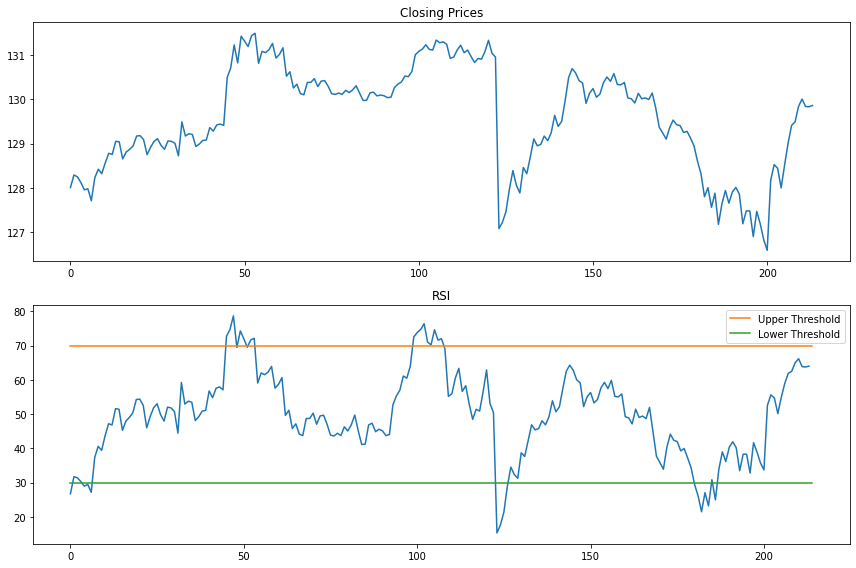

In [3]:
strategy.show_RSI()

**Analysis:**

The upper graph plots the closing prices of a financial asset over time, which shows the price movement and trend direction of the asset.
The lower graph shows the Relative Strength Index (RSI), a momentum indicator that ranges from 0 to 100, indicating whether an asset might be considered overbought (above the 70 level) or oversold (below the 30 level).
Observations from the RSI chart suggest potential overbought or oversold conditions when the line crosses the respective upper (overbought) or lower (oversold) threshold lines. These conditions might be used by traders to predict potential trend reversals or confirmations, although they should ideally be used in conjunction with other indicators for more reliable signals.


### <font color='navy'>  Simple Moving Average | SMA <font color='black'> 


SMA is a mathematical tool used in the financial markets to smooth out price data over a specified period of time by creating a constantly updated average price. Essentially, it gives traders a clearer view of the price trend over a given time frame without the noise of short-term price fluctuations

* **SMA(5):** This is a short-term moving average that calculates the average closing price over the last 5 intervals. It reacts more quickly to recent price changes and is often used to gauge immediate trend direction.

* **SMA(21):** In contrast, this is a long-term moving average that averages prices over the last 21 intervals. It moves slower and helps identify the longer-term trend.

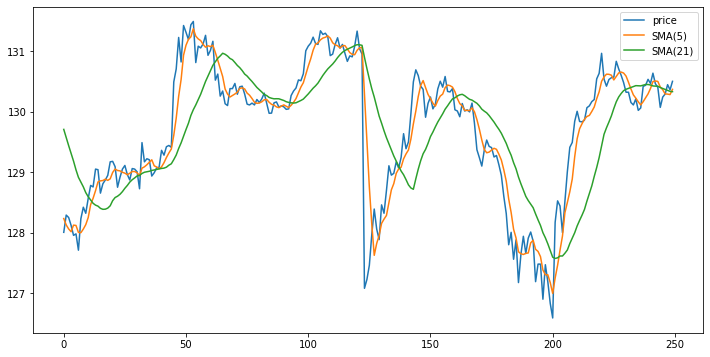

In [4]:
strategy.show_SMAs()

**Analysis**

* **Trend Identification:** Where the short-term SMA is above the long-term SMA, it typically indicates a bullish trend, and vice versa for a bearish trend.

* **Crossovers:** Points where the SMAs cross can be indicative of potential trend reversals

* **Price Interaction:** The price seems to oscillate around the SMAs. When the price moves away from both SMAs, it might indicate strong momentum.


### <font color='navy'>  Moving Average Convergence/Divergence | MACD <font color='black'> 


The Moving Average Convergence/Divergence (MACD) strategy stands as one of the cornerstone technical analysis tools utilized by traders in financial markets. It provides insights into potential shifts in market momentum and offers actionable trade signals. By analyzing the interplay between different moving averages, the MACD strategy assists traders in identifying entry and exit points, thus enhancing their decision-making process. This introduction aims to provide a concise overview of the MACD strategy, outlining its key components and how it facilitates informed trading decisions.

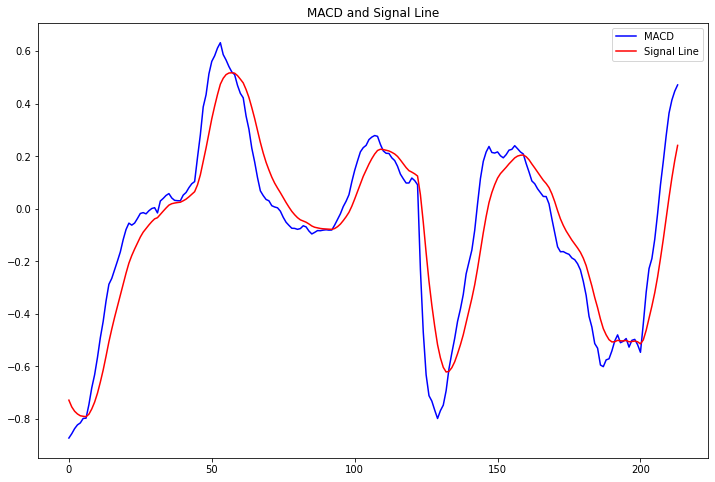

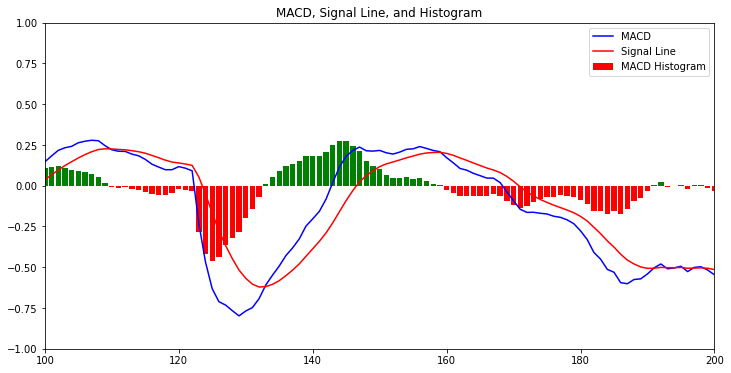

In [5]:
strategy.show_MACD()

**Analysis:**

The first chart displays the MACD line (blue) and the Signal line (red). The MACD line is the result of the calculation mentioned above, while the Signal line is a 9-period EMA of the MACD line itself. Crossovers of these lines are used as signals to buy or sell.

The second chart includes the same MACD line and Signal line, with the addition of the MACD Histogram (green and red bars). The histogram represents the difference between the MACD line and the Signal line. When the histogram is above zero, the MACD line is above the Signal line, and when it's below zero, the MACD line is below the Signal line. The histogram's height and color change signify the strength and direction of the trend.



### <font color='navy'>  Parabolic Stop and Reverse | SAR <font color='black'> 


The Parabolic Stop and Reverse (SAR) is a popular technical analysis tool used to determine the momentum and potential reversals in a market's price direction. This indicator is known as a trend follower, and it is capable of providing both a trailing stop-loss level and entry or exit signals. The SAR dots are placed below or above the price line, depending on the prevailing trend

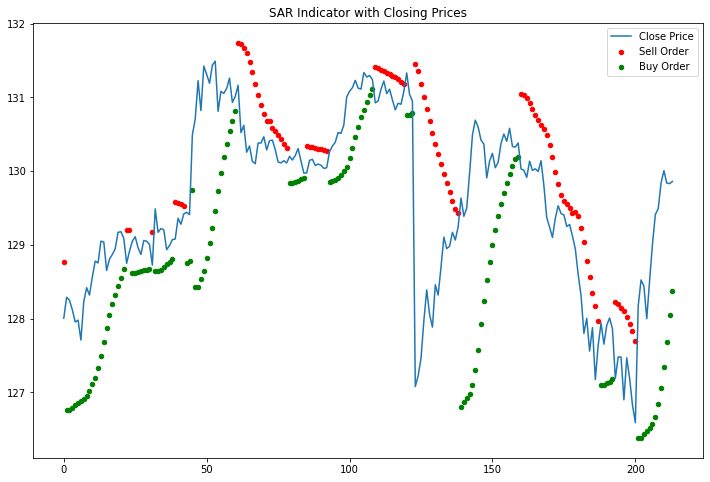

In [6]:
strategy.show_SAR()

**Analysis**

* **Green Dots:** These are located below the price line and represent suggested 'Buy Order' points, implying that the trend is upward, and it might be an opportunity to go long or purchase the asset.

* **Red Dots:** These are placed above the price line and represent suggested 'Sell Order' points, indicating that the trend is downward, and it might be a signal to sell or go short on the asset

We notice that the SAR can provide timely signals for entering or exiting trades, closely following price movements. However, during highly volatile periods, the SAR may produce signals that could lead to frequent trading if not combined with other indicators or filters


### <font color='navy'>  Average Directional Index | ADX <font color='black'> 


The Average Directional Index is a technical analysis indicator used to quantify the strength of a trend. The ADX itself is non-directional; it simply measures the strength of the trend, whether it's an uptrend or a downtrend. It includes with the ADX are the Positive Directional Indicator +DI and Negative Directional Indicator -DI, which help determine the direction of the trend

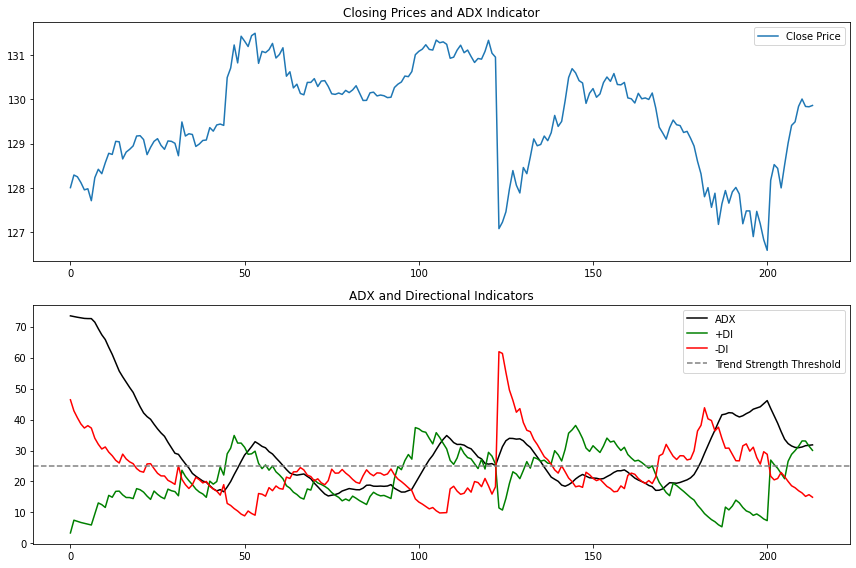

In [7]:
strategy.show_ADX_strat()

**Analysis**

* **ADX Line (Black):** Fluctuates above and below the threshold of 25, indicating periods of varying trend strength.

* **+DI Line (Green):** When this line is above the -DI line, it suggests that an uptrend is stronger than the downtrend.

* **-DI Line (Red):** Conversely, when this line is above the +DI line, it suggests a stronger downtrend.



* **Trend Strength:** The periods where the ADX line is above 25 coincide with more significant price movements, suggesting strong trends.

* **Trend Direction:** The crossovers between the +DI and -DI lines can signal potential trend reversals. For instance, when the +DI crosses above the -DI, it could be considered a buying opportunity, and when the -DI crosses above the +DI, it might signal a potential selling point.

* **Market Phases:** The plot shows that the market goes through phases of trending and consolidation, as indicated by the ADX's rise above or fall below the threshold level.


### <font color='navy'>  Stochastic <font color='black'> 


The Stochastic strategy is a renowned technical analysis method embraced by traders to assess the momentum of an asset and pinpoint potential trend reversals. By analyzing the relationship between an asset's closing price and its price range over a specific period, the Stochastic strategy offers insights into overbought and oversold conditions, aiding traders in identifying opportune moments to enter or exit trades. This introduction endeavors to provide a concise overview of the Stochastic strategy, highlighting its core principles and its significance in assisting traders in making well-informed decisions in financial markets.

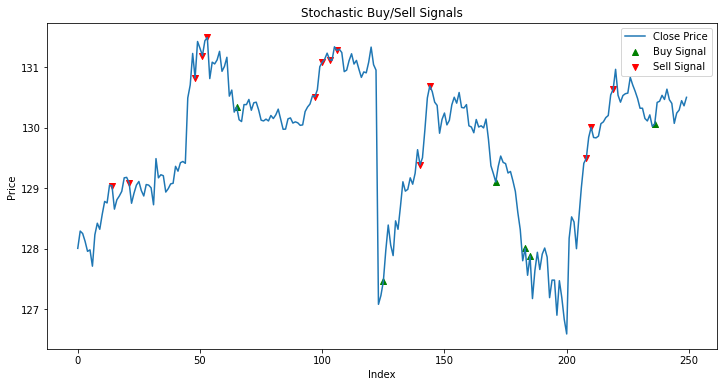

In [8]:
strategy.plot_stochastic_signals()

**Analysis:**

The graph shows a stock price chart with Stochastic oscillator buy and sell signals. Buy signals are marked with green triangles when the stock is potentially oversold, and sell signals with red triangles when it might be overbought. These signals are intended to suggest optimal entry and exit points for traders.





---

## <font color='navy'>  Order 1 <font color='black'> 

In this section, we'll demonstrate a practical example using a 5-minute time frame. Here's how we'll proceed:
    
* Initialize by declaring the chosen time frame.
* Test all combinations.
* Plot the result of the best one.
* Optimize the parameters of the best indicators, as well as the take_profit, stop_loss, and number of shares.
* Plot the results of the best optimized combination.
* Plot the best optimized combination on test data with the same time frame.

### <font color='navy'>  Run all combinations <font color='black'> 

In [1]:
from technical_analysis import Operation, TradingStrategy
strategy = TradingStrategy('5m')
strategy.run_combinations()

Ejecutando con combinación de indicadores: ['RSI']
Ejecutando con combinación de indicadores: ['SMA']
Ejecutando con combinación de indicadores: ['MACD']
Ejecutando con combinación de indicadores: ['SAR']
Ejecutando con combinación de indicadores: ['ADX']
Ejecutando con combinación de indicadores: ['Stoch']
Ejecutando con combinación de indicadores: ['RSI', 'SMA']
Ejecutando con combinación de indicadores: ['RSI', 'MACD']
Ejecutando con combinación de indicadores: ['RSI', 'SAR']
Ejecutando con combinación de indicadores: ['RSI', 'ADX']
Ejecutando con combinación de indicadores: ['RSI', 'Stoch']
Ejecutando con combinación de indicadores: ['SMA', 'MACD']
Ejecutando con combinación de indicadores: ['SMA', 'SAR']
Ejecutando con combinación de indicadores: ['SMA', 'ADX']
Ejecutando con combinación de indicadores: ['SMA', 'Stoch']
Ejecutando con combinación de indicadores: ['MACD', 'SAR']
Ejecutando con combinación de indicadores: ['MACD', 'ADX']
Ejecutando con combinación de indicadores: ['

For this timeframe, the best combination is: 'SAR' and 'ADX'. 

### <font color='navy'>  Backtesting of the best combination <font color='black'> 

Here we test a trading strategy on historical data to determine its potential for future success. It allows traders to simulate a strategy's performance without risking actual capital, providing insights into the strategy's risk and profitability before live implementation.

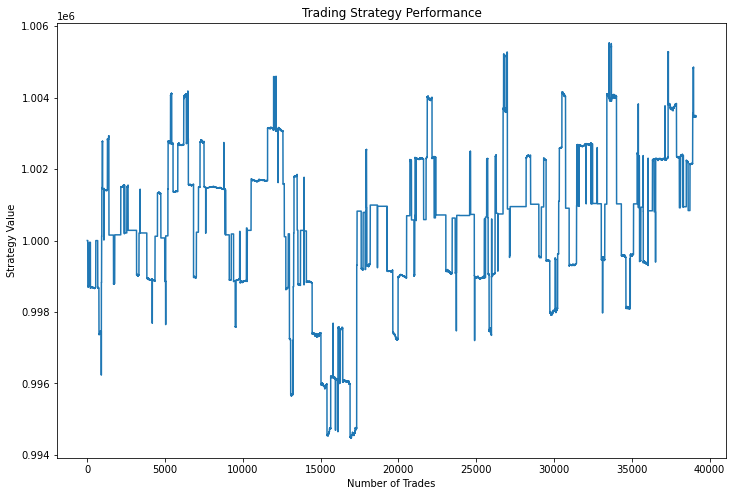

In [2]:
strategy.plot_results(best = True)

### <font color='navy'>  Best model without optimization on test <font color='black'> 

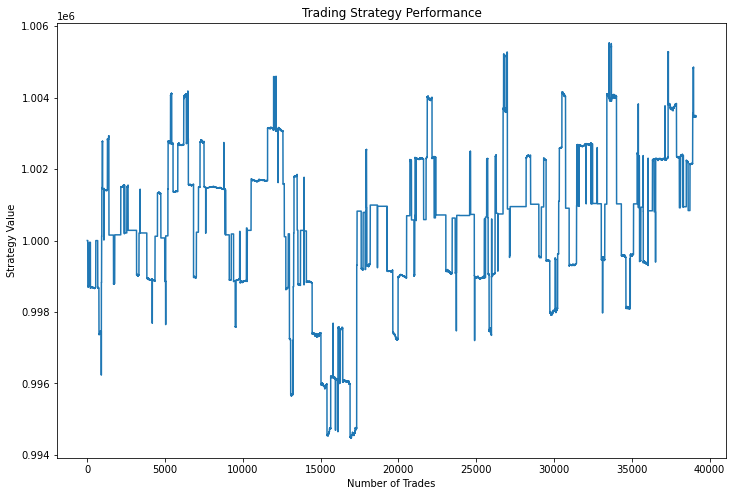

In [3]:
strategy.test()

In [4]:
strategy.strategy_value[-1]

1003456.5500030748

### <font color='navy'>  Parameters Optimization <font color='black'> 

In [5]:
strategy.optimize_parameters()

[I 2024-02-25 18:02:37,586] A new study created in memory with name: no-name-449bac46-bf53-47ed-a17c-dfb0375c1e28
[I 2024-02-25 18:03:42,527] Trial 0 finished with value: 1005568.8076578247 and parameters: {'sar_step': 0.022677838882670907, 'sar_max_step': 0.31816400872081735, 'adx_window': 14, 'take_profit': 1.1771700413921955, 'stop_loss': 0.9738732727166926, 'n_shares': 20}. Best is trial 0 with value: 1005568.8076578247.
[I 2024-02-25 18:04:46,716] Trial 1 finished with value: 981400.0933166017 and parameters: {'sar_step': 0.05283591998927805, 'sar_max_step': 0.1522379197215852, 'adx_window': 12, 'take_profit': 1.069570014299885, 'stop_loss': 0.9586312472156345, 'n_shares': 458}. Best is trial 0 with value: 1005568.8076578247.
[I 2024-02-25 18:05:50,235] Trial 2 finished with value: 929899.5918473129 and parameters: {'sar_step': 0.03184497943165616, 'sar_max_step': 0.1083157937952703, 'adx_window': 24, 'take_profit': 1.1777799731578982, 'stop_loss': 0.8836036352423134, 'n_shares': 

Mejores parámetros encontrados: {'sar_step': 0.02277844481656575, 'sar_max_step': 0.44802786984875, 'adx_window': 15, 'take_profit': 1.0857548500007652, 'stop_loss': 0.9169587753386458, 'n_shares': 310}


### <font color='navy'>  Strategy backtest with optimized paramters <font color='black'> 

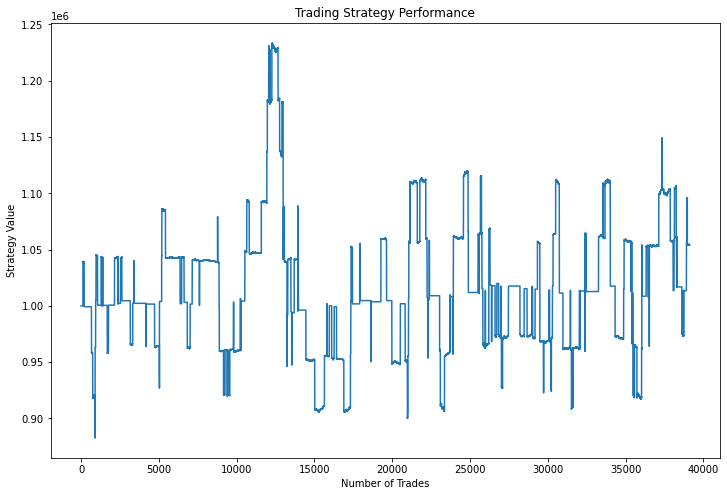

In [6]:
strategy.plot_results(best = True)

### <font color='navy'>  Best optimized strategy | Final value <font color='black'> 

In [7]:
strategy.strategy_value[-1]

1054010.5038149867

### <font color='navy'>  Run and backtest best strategy | Test data <font color='black'> 

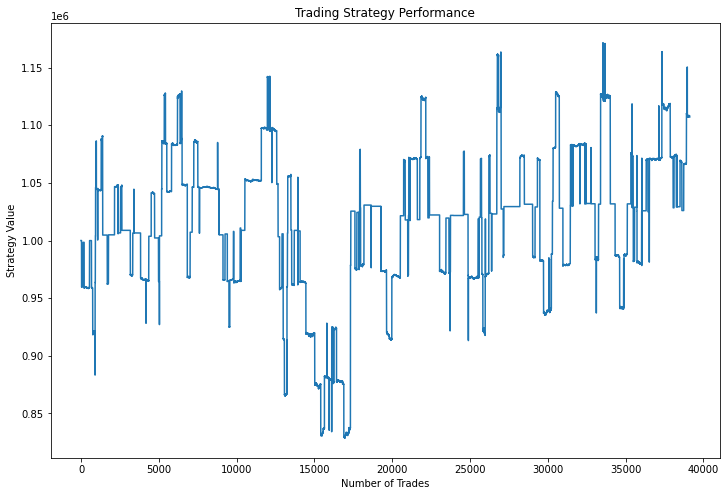

In [9]:
strategy.test()

### <font color='navy'>  Test final value <font color='black'>

In [10]:
strategy.strategy_value[-1]

1107153.0500953256

In the first chart, "Best model without optimization on test," we see the strategy's value over a series of trades without any parameter tuning. The performance appears relatively stable, hovering around the initial strategy value, with no significant growth over the number of trades executed. This suggests that while the strategy may be consistent, it lacks the efficacy to generate substantial returns as is.

Contrastingly, the second chart, "Strategy backtest with optimized parameters," displays the strategy's performance after optimization. There is a noticeable difference in the strategy value, which shows greater variability and peaks that exceed the initial value by a more significant margin. This implies that the optimization process has potentially enhanced the strategy's ability to capitalize on profitable opportunities in the market.

The comparison between the two suggests that optimization can have a marked impact on a trading strategy's success, enhancing its ability to generate returns. However, the increased variability also hints at potentially higher risk, which underscores the importance of risk management in trading strategy development. The results also serve as a reminder that past performance is not indicative of future results, and even an optimized strategy should be approached with caution and monitored closely.

## Pasive Strategy
Passive investing is an investment strategy to maximize returns by minimizing buying and selling.

The passive asset return from the first close to the last close is: 18.54%
The strategy return from the first close to the last close is: 10.72%


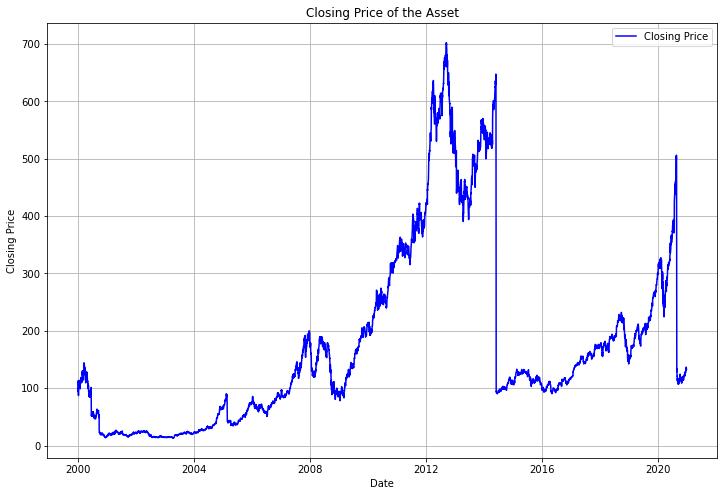

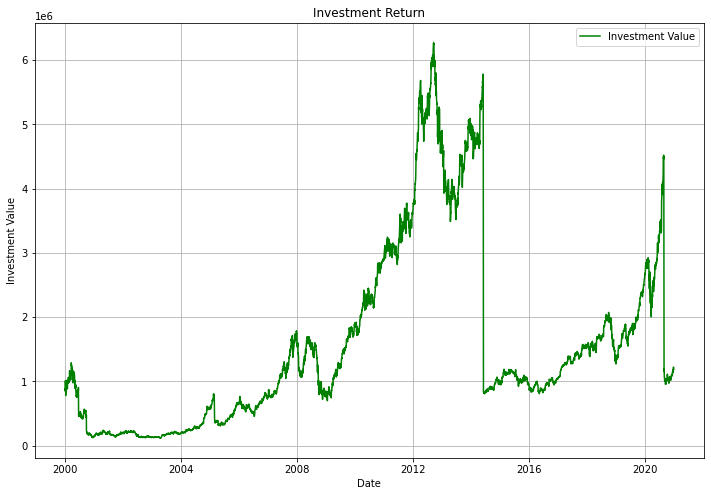

The final value of the passive investment: $1,185,443.41


In [32]:
# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Get the closing price of the first and last data
first_close = data.iloc[0]['Close']
last_close = data.iloc[-1]['Close']

# Calculate the passive asset return
passive_return = (last_close - first_close) / first_close

print("The passive asset return from the first close to the last close is: {:.2%}".format(passive_return))

# Comparison with the strategy used
cash = 1000000
cash_final = 1107153.05
strategy_return = (cash_final - cash) / cash
print("The strategy return from the first close to the last close is: {:.2%}".format(strategy_return))

# Sort the data by date if they are not sorted
data = data.sort_values(by='Date')
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.title('Closing Price of the Asset')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the cumulative return
data['Returns'] = data['Close'].pct_change().fillna(0)

# Calculate the cumulative value
initial_investment = cash
data['Investment_Value'] = (1 + data['Returns']).cumprod() * initial_investment
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Investment_Value'], label='Investment Value', color='green')
plt.title('Investment Return')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
plt.grid(True)
plt.show()

final_value = data['Investment_Value'].iloc[-1]
print("The final value of the passive investment: ${:,.2f}".format(final_value))


The passive asset, represented by the underlying security, demonstrated a substantial return of 18.54% from the initial to the final closing prices, indicating favorable market conditions over the observed period. On the other hand, the implemented strategy yielded a lower return of 10.72%, suggesting that while it still produced positive results, it underperformed compared to simply holding the asset passively. This observation prompts a critical examination of the strategy's effectiveness and highlights the importance of continuously evaluating and adjusting investment strategies to optimize returns in evolving market environments.